In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [8]:
train = pd.read_csv("/home/teerawat.c/projects/HMS_HBAC/datasets/hms-harmful-brain-activity-classification/train.csv")
train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [9]:
train.shape

(106800, 15)

In [10]:
train_info = train.info()
train_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [7]:
train.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [11]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
categorical_summary = train[categorical_columns].describe()
categorical_summary

,expert_consensus
count,106800
unique,6
top,Seizure
freq,20933


In [12]:
list(set(train['expert_consensus'].unique()))

['Other', 'LPD', 'LRDA', 'GRDA', 'GPD', 'Seizure']

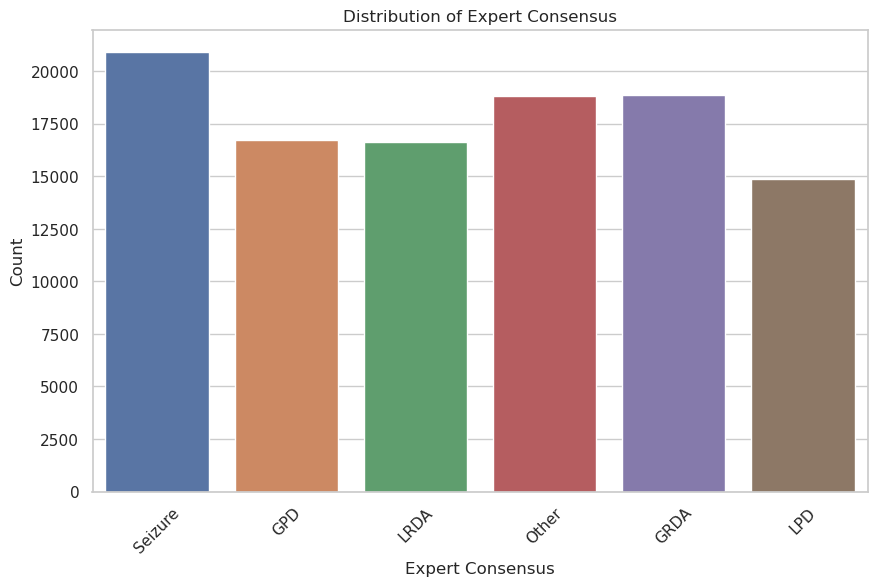

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='expert_consensus')
plt.title('Distribution of Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/home/teerawat.c/miniconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


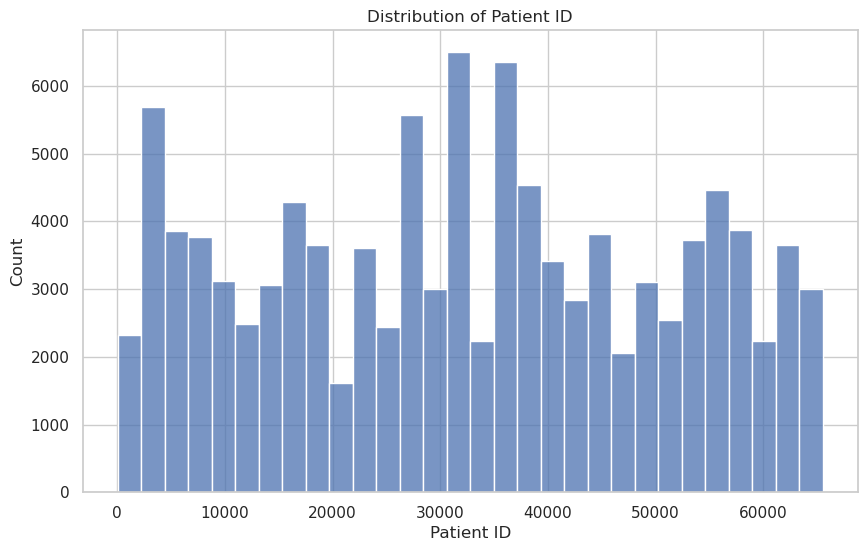

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train['patient_id'], bins=30, kde=False)
plt.title('Distribution of Patient ID')
plt.xlabel('Patient ID')
plt.ylabel('Count')
plt.show()

/home/teerawat.c/miniconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/teerawat.c/miniconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/teerawat.c/miniconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/teerawat.c/miniconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

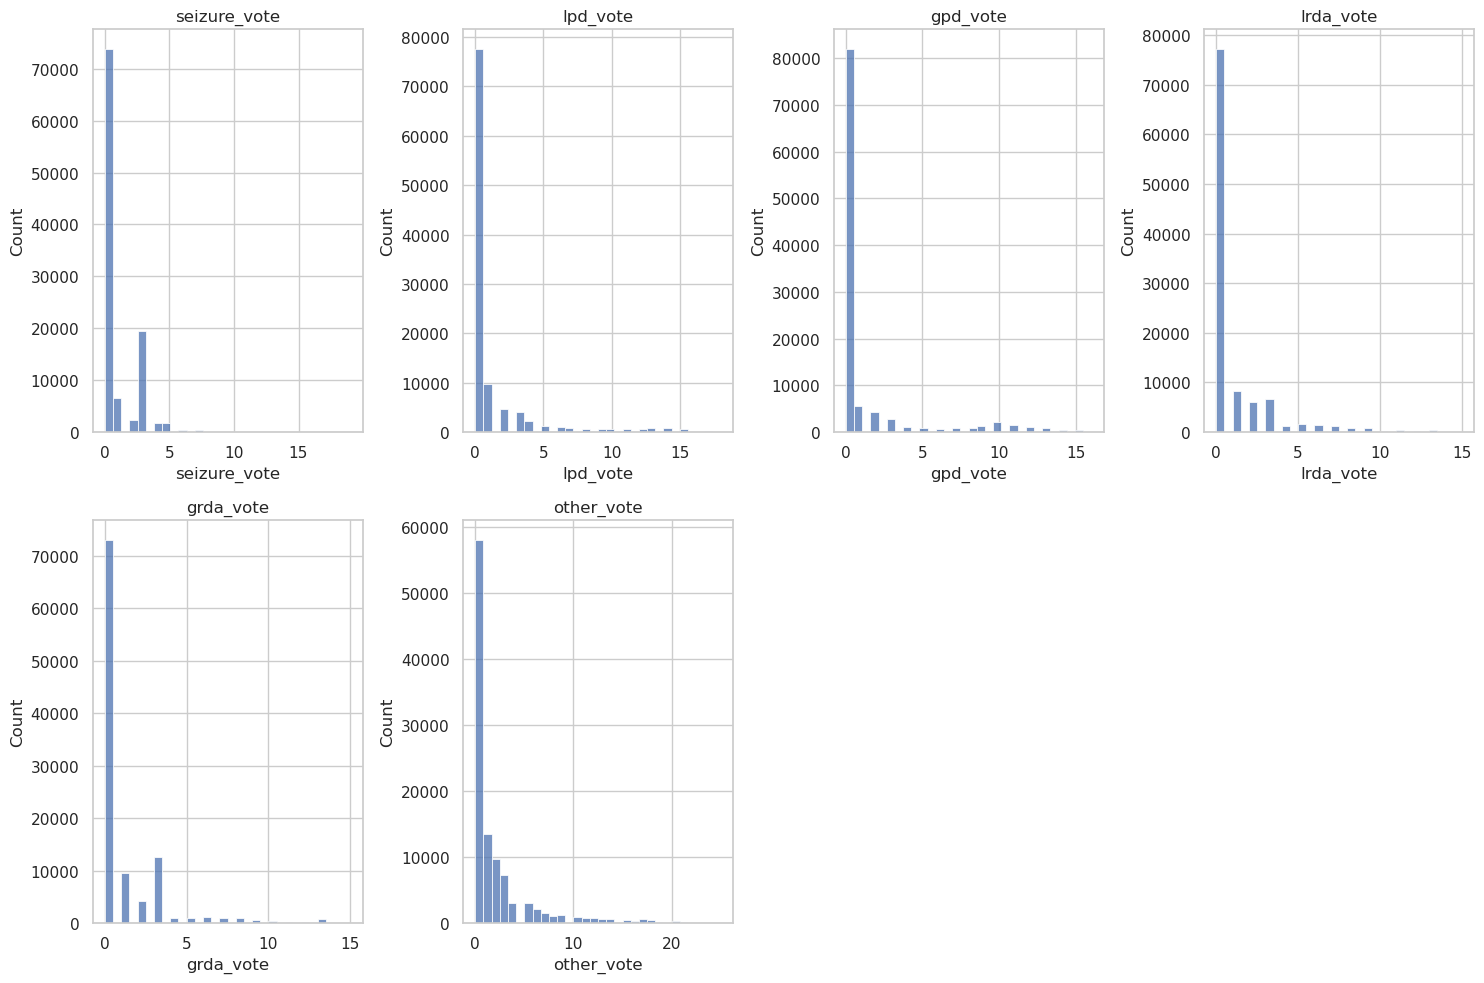

In [17]:
targets = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

plt.figure(figsize=(15, 10))
for i, column in enumerate(targets, 1):
    plt.subplot(2, 4, i)
    sns.histplot(train[column], kde=False, bins=30)
    plt.title(column)
plt.tight_layout()

In [ ]:
correlation_targets = train[targets].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_targets, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Vote Columns')
plt.show()

plt.figure(figsize=(12, 10))
for i, column in enumerate(targets, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=train, x='expert_consensus', y=column)
    plt.title(f'Distribution of {column} by Expert Consensus')

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(train[targets])
plt.suptitle('Pairwise Relationships of Target Votes', y=1.02)
plt.show()

In [ ]:
offset_stats = train[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds']].describe()

plt.figure(figsize=(12, 6))
sns.histplot(train['eeg_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of EEG Label Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(train['spectrogram_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of Spectrogram Label Offset Seconds')
plt.xlabel('Spectrogram Label Offset Seconds')
plt.ylabel('Count')
plt.show()

offset_stats

In [ ]:
total_eegs = len(train['eeg_id'].unique())
total_eegs

In [ ]:
all_eeg_label_offset_seconds = sorted(list(train['eeg_label_offset_seconds'].unique()))
len(all_eeg_label_offset_seconds), str(all_eeg_label_offset_seconds[0:5]), str(all_eeg_label_offset_seconds[-5:])

In [ ]:
all_spectrogram_label_offset_seconds = sorted(list(train['spectrogram_label_offset_seconds'].unique()))
len(all_spectrogram_label_offset_seconds), str(all_spectrogram_label_offset_seconds[0:5]), str(all_spectrogram_label_offset_seconds[-5:])

In [ ]:
vote_counts_by_consensus = train.groupby('expert_consensus')[targets].sum()

plt.figure(figsize=(12, 8))
vote_counts_by_consensus.plot(kind='bar', stacked=True)
plt.title('Overall Vote Counts by Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Vote Types')
plt.show()

In [ ]:
cumulative_votes = train.groupby('eeg_label_offset_seconds')[targets].sum().cumsum().reset_index()

plt.figure(figsize=(12, 8))
for column in targets:
    plt.plot(cumulative_votes['eeg_label_offset_seconds'], cumulative_votes[column], label=column)

plt.title('Vote Counts Over EEG Label Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Total Votes')
plt.legend()
plt.show()

In [ ]:
cumulative_votes = train.groupby('spectrogram_label_offset_seconds')[targets].sum().cumsum().reset_index()

plt.figure(figsize=(12, 8))
for column in targets:
    plt.plot(cumulative_votes['spectrogram_label_offset_seconds'], cumulative_votes[column], label=column)

plt.title('Vote Counts Over Spectrogram Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Total Votes')
plt.legend()
plt.show()

In [ ]:
cumulative_votes

In [ ]:
sorted_data = train.sort_values(by=['eeg_id', 'eeg_sub_id'])

sorted_data['offset_difference'] = sorted_data.groupby('eeg_id')['eeg_label_offset_seconds'].diff()

offset_differences = sorted_data['offset_difference'].dropna()

offset_difference_stats = offset_differences.describe()

plt.figure(figsize=(12, 6))
sns.histplot(offset_differences, bins=30, kde=True)
plt.title('Offset Differences within EEG IDs')
plt.xlabel('Offset Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sample_patients = train['patient_id'].sample(20, random_state=1).values
sample_data = train[train['patient_id'].isin(sample_patients)]

for i, vote_type in enumerate(targets, 1):
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='patient_id', y=vote_type, data=sample_data)
    plt.title(f'Distribution of {vote_type} for Selected Patients')
    plt.xlabel('Patient ID')
    plt.ylabel(f'{vote_type} Count')
    plt.show()

In [ ]:
total_votes_per_pat = train.groupby('patient_id')[targets].sum().sum(axis=1)
normalized_votes = train.groupby('patient_id')[targets].sum().div(total_votes_per_pat, axis=0)
mean_vote_ratio = normalized_votes.mean()
print( mean_vote_ratio )